# FlightDelayPy

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress


In [2]:
flight_data_df = pd.read_csv("data/T_ONTIME_REPORTING.csv")
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 71 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MONTH                    538837 non-null  int64  
 1   DAY_OF_MONTH             538837 non-null  int64  
 2   DAY_OF_WEEK              538837 non-null  int64  
 3   FL_DATE                  538837 non-null  object 
 4   OP_UNIQUE_CARRIER        538837 non-null  object 
 5   ORIGIN_AIRPORT_ID        538837 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID    538837 non-null  int64  
 7   ORIGIN_CITY_MARKET_ID    538837 non-null  int64  
 8   ORIGIN                   538837 non-null  object 
 9   ORIGIN_CITY_NAME         538837 non-null  object 
 10  ORIGIN_STATE_ABR         538837 non-null  object 
 11  ORIGIN_STATE_FIPS        538837 non-null  int64  
 12  ORIGIN_STATE_NM          538837 non-null  object 
 13  ORIGIN_WAC               538837 non-null  int64  
 14  DEST

In [4]:
flight_data_df.shape

(538837, 71)

In [5]:
flight_data_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST

In [6]:
flight_data_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF
count,538837.0,538837.000000,538837.000000,538837.000000,5.388370e+05,538837.000000,538837.000000,538837.000000,538837.000000,5.388370e+05,...,1345.000000,1121.000000,1121.000000,1345.000000,1443.000000,1.443000e+03,1443.000000,1443.000000,1443.000000,1135.000000
mean,1.0,16.095398,3.890269,12653.203128,1.265324e+06,31748.240980,26.713025,54.355763,12653.175350,1.265321e+06,...,0.833457,437.040143,292.958965,38.810409,12707.566182,1.270760e+06,1374.341649,35.939709,27.994456,1453.559471
std,0.0,8.929168,2.076230,1524.197257,1.524195e+05,1310.151761,16.676881,26.919824,1524.146385,1.524145e+05,...,0.372706,250.781370,258.788893,178.614061,1524.158696,1.524159e+05,546.036453,39.015571,31.141104,514.619588
min,1.0,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,...,0.000000,58.000000,4.000000,0.000000,10135.000000,1.013506e+06,1.000000,2.000000,2.000000,3.000000
25%,1.0,8.000000,2.000000,11292.000000,1.129202e+06,30693.000000,12.000000,33.000000,11292.000000,1.129202e+06,...,1.000000,276.000000,143.000000,0.000000,11292.000000,1.129202e+06,1028.500000,15.000000,11.000000,1123.000000
50%,1.0,16.000000,4.000000,12889.000000,1.288904e+06,31454.000000,26.000000,44.000000,12889.000000,1.288904e+06,...,1.000000,361.000000,203.000000,0.000000,12889.000000,1.288904e+06,1334.000000,24.000000,17.000000,1444.000000
75%,1.0,24.000000,6.000000,14027.000000,1.402702e+06,32467.000000,41.000000,82.000000,14027.000000,1.402702e+06,...,1.000000,498.000000,315.000000,0.000000,14057.000000,1.405702e+06,1841.000000,41.000000,31.000000,1827.500000
max,1.0,31.000000,7.000000,16869.000000,1.686902e+06,35991.000000,78.000000,93.000000,16869.000000,1.686902e+06,...,1.000000,1733.000000,1538.000000,2556.000000,15919.000000,1.591905e+06,2400.000000,353.000000,260.000000,2400.000000


In [7]:
data = flight_data_df[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']]
headers = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']
df1 = pd.DataFrame(data, columns=headers)
df1.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,83.0,2.0,0.0,342.0,NaN
4,11.0,0.0,0.0,0.0,61.0,NaN


In [8]:
def airline_abbreviation_to_name(x): 
    airline_abb = {
        "WN" : "Southwest Airlines",
        "DL" : "Delta Airlines",
        "AA" : "American Airlines",
        "UA" : "United Airlines",
        "OO" : "SkyWest Airlines Inc.",
        "YX" : "Republic Airline",
        "B6" : "JetBlue Airways",
        "NK" : "Spirit Airlines",
        "AS" : "Alaska Airlines",
        "MQ" : "Envoy Air",
        "9E" : "Endeavor Air Inc.",
        "OH" :    "PSA Airlines Inc.",
        "F9" : "Frontier Airlines",
        "G4" : "Allegiant Air",
        "HA" : "Hawaiian Airlines"
    }
    for key, value in airline_abb.items():
        if x == key:
            x = value
    return x

flight_data_df["Airline"] = flight_data_df["OP_UNIQUE_CARRIER"].apply(airline_abbreviation_to_name)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [38]:
# Check for duplicate data
flight_data_df.loc[flight_data_df.duplicated()]
# Drop the Marketing_Airline_Network column
flight_data_df = flight_data_df.drop(columns = "OP_UNIQUE_CARRIER")
flight_data_df.head()

KeyError: "['OP_UNIQUE_CARRIER'] not found in axis"

In [9]:
airlines=flight_data_df.Airline.unique()
len(airlines)

15

In [10]:
value=flight_data_df.Airline.value_counts()
value

Airline
Southwest Airlines       112430
Delta Airlines            75174
American Airlines         74999
United Airlines           56657
SkyWest Airlines Inc.     50347
Republic Airline          24476
JetBlue Airways           23249
Spirit Airlines           21876
Alaska Airlines           19801
Envoy Air                 18849
Endeavor Air Inc.         16926
PSA Airlines Inc.         15456
Frontier Airlines         13285
Allegiant Air              8615
Hawaiian Airlines          6697
Name: count, dtype: int64

<Axes: ylabel='Airline'>

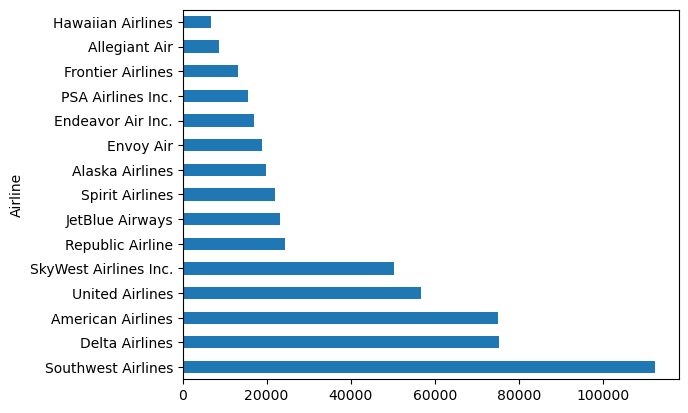

In [11]:
value.plot(kind='barh')

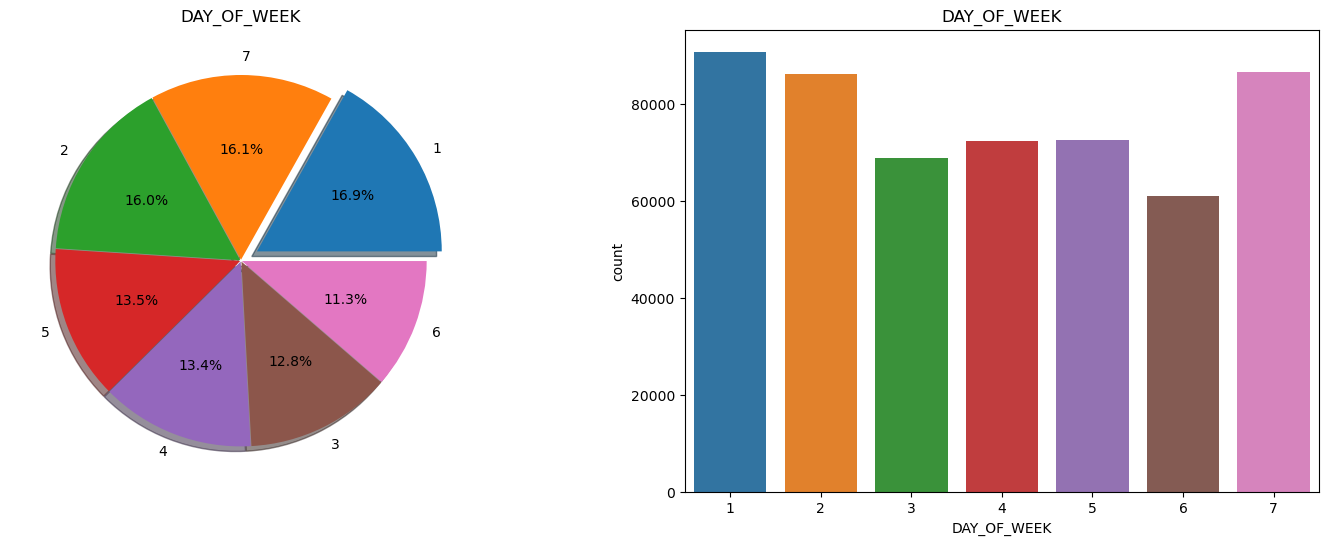

DAY_OF_WEEK represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)


In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Pie chart
flight_data_df['DAY_OF_WEEK'].value_counts().plot.pie(explode=[0.1, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005], autopct='%1.1f%%', ax=ax[0], shadow=True, labels=flight_data_df['DAY_OF_WEEK'].value_counts().index)
ax[0].set_title('DAY_OF_WEEK')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='DAY_OF_WEEK', data=flight_data_df, ax=ax[1])
ax[1].set_title('DAY_OF_WEEK')

plt.show()
print('DAY_OF_WEEK represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)')

In [13]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.map("{:04}".format)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [14]:
flight_data_df['DEP_TIME'] =flight_data_df['DEP_TIME'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [30]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.replace(to_replace ='24:00', value = '00:00', regex = True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline,DepTimeStamp
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 60:1.0
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 72:4.0
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 12:45.0
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 18:55.0
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 19:19.0


In [31]:
flight_data_df.DEP_TIME[268503]

'12:39.0'

In [32]:
flight_data_df['DepTimeStamp']=np.nan

In [33]:
flight_data_df['DepTimeStamp'] = flight_data_df.FL_DATE.map(str) + " " + flight_data_df.DEP_TIME
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline,DepTimeStamp
0,1,1,7,1/1/2023 12:00:00 AM,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 60:1.0
1,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 72:4.0
2,1,1,7,1/1/2023 12:00:00 AM,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 12:45.0
3,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 18:55.0
4,1,1,7,1/1/2023 12:00:00 AM,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,1/1/2023 12:00:00 AM 19:19.0


ValueError: Must pass 2-d input. shape=()

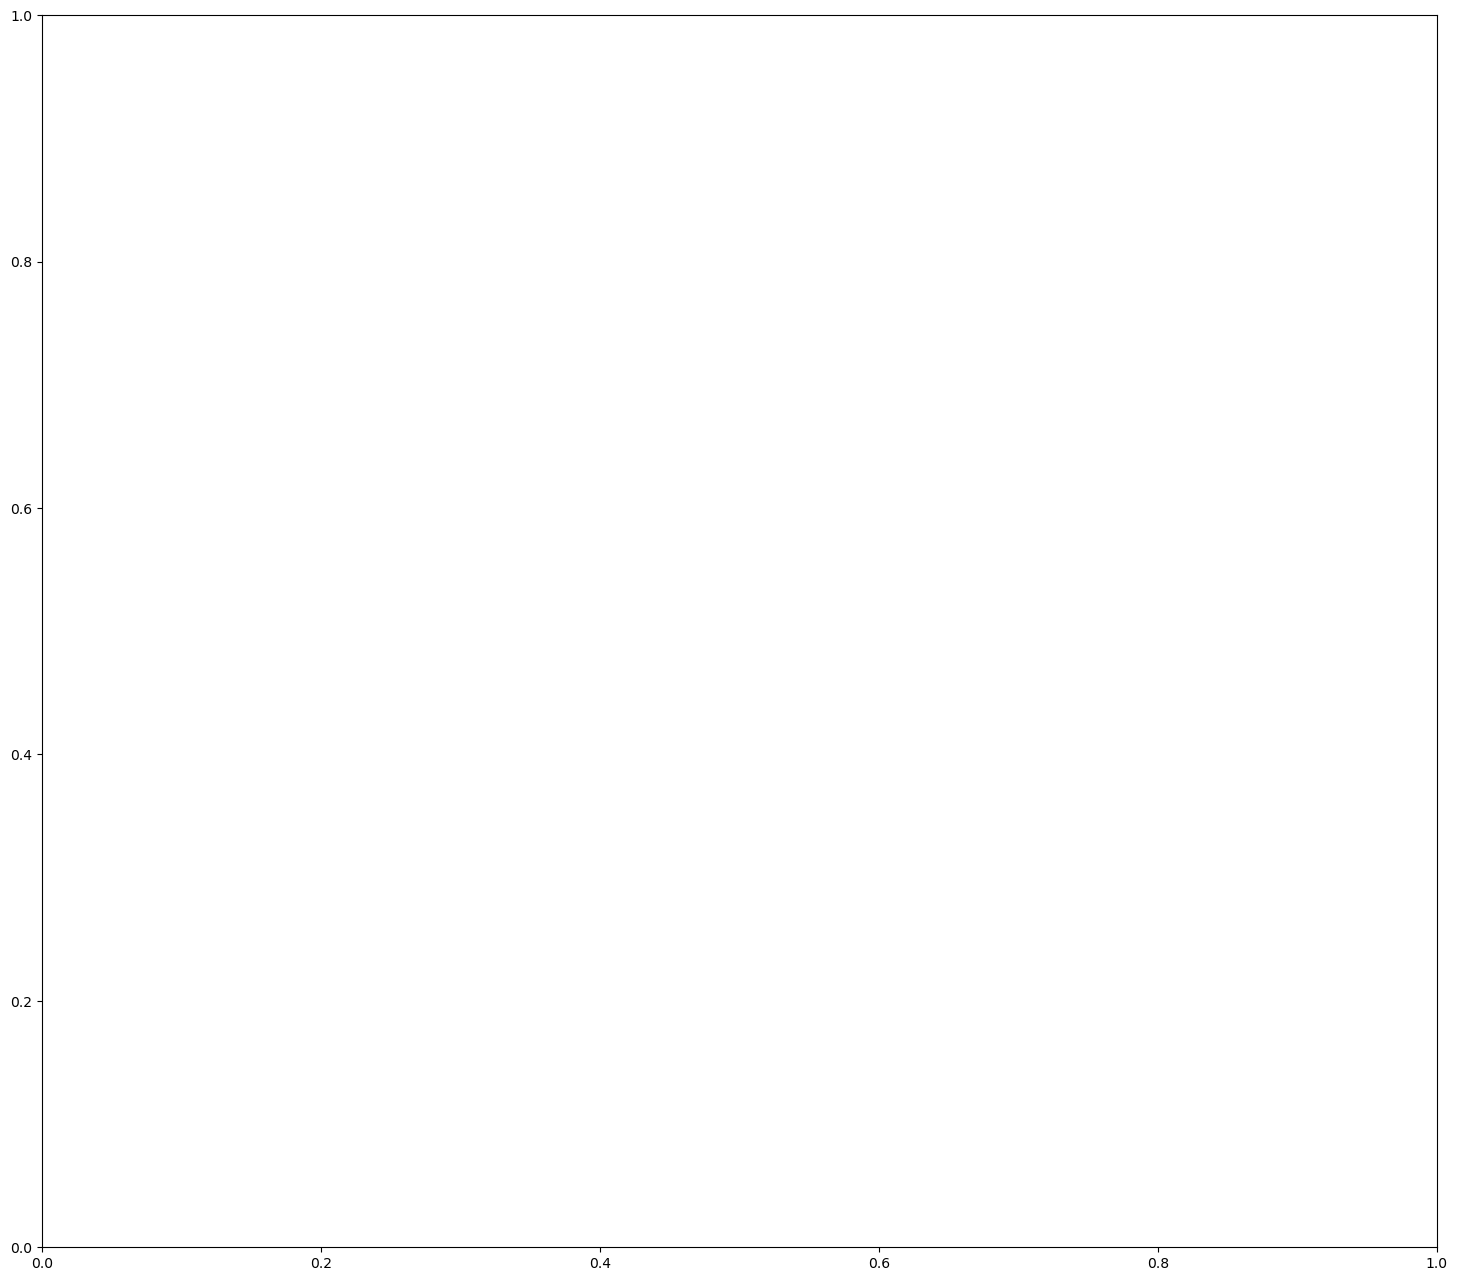

In [43]:
corrmat = flight_data_df.corr
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True,  cmap="YlGnBu",annot=True);
plt.show()

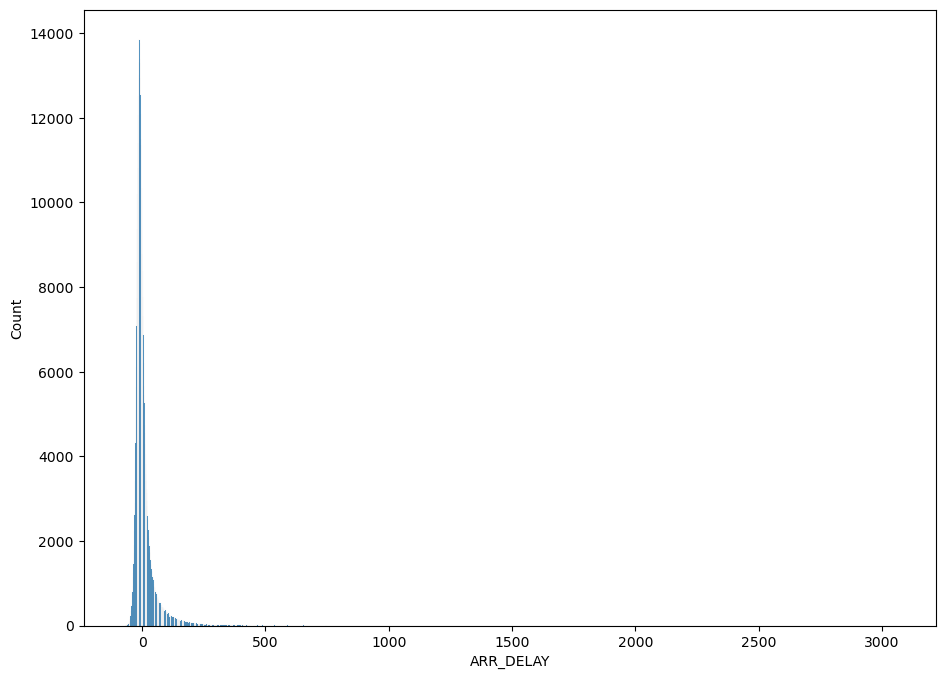

In [45]:
#Arrival delay is the Difference in minutes between scheduled and actual arrival time
sns.histplot(flight_data_df['ARR_DELAY'], )

# figure size in inches
rcParams['figure.figsize'] = 11,8
plt.show()

In [47]:
print("Skewness: %f" % flight_data_df['ARR_DELAY'].skew())
print("Kurtosis: %f" % flight_data_df['ARR_DELAY'].kurt())

Skewness: 9.855217
Kurtosis: 190.858695


- The data is very closely distributed. The height of the peak is greater than width of the peak.

- So the majority of the delays are short timed. Compared to short time delay, minority of the delays are long timed.

In [51]:
min_value = flight_data_df.ARR_DELAY.min()
min_value

-80.0

In [52]:
max_value = flight_data_df.ARR_DELAY.max()
max_value

3063.0

In [56]:
df2 = flight_data_df.filter(['MONTH','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY'], axis=1)
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)

# figure size in inches
rcParams['figure.figsize'] = 7,4
plt.show()

AttributeError: 'DataFrame' object has no attribute 'legend'

C:\Users\Admin\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


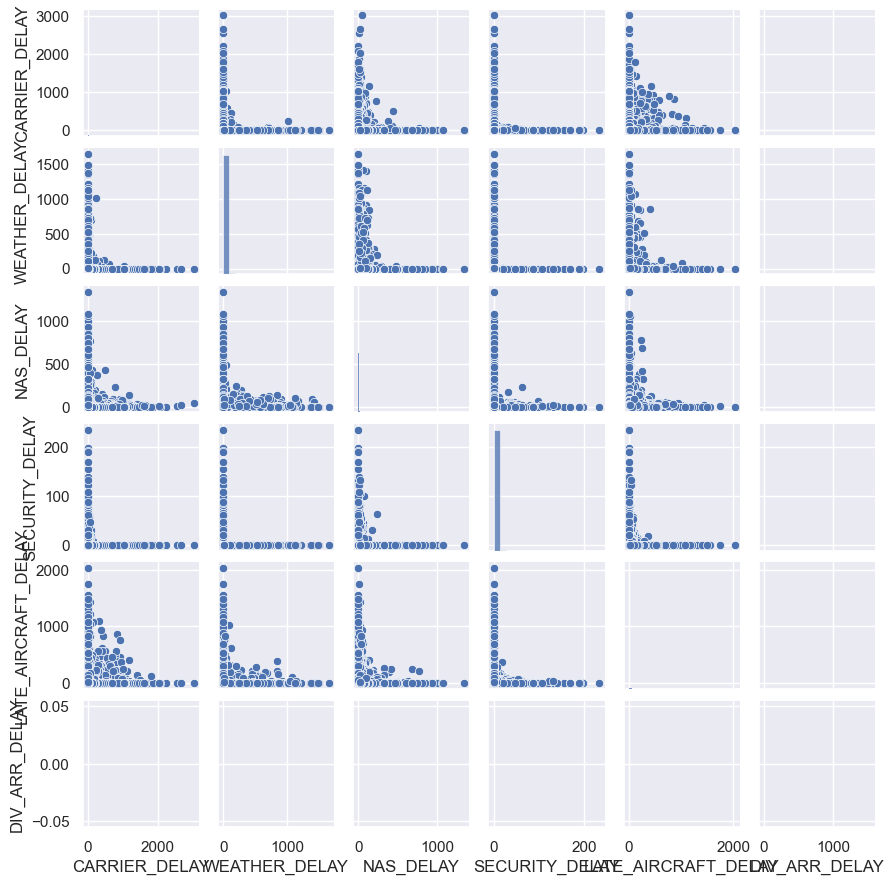

In [58]:
sns.set()
cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']
sns.pairplot(flight_data_df[cols], size = 1.5)
plt.show()